# Лабораторная работа 3, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий в ЛР 1

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

Сделаем предобработку данных

In [2]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [3]:
# Инициализация и обучение модели решающего дерева
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_shelter, y_train_shelter)

DecisionTreeClassifier(random_state=42)

Оценка качества модели

Accuracy: 0.73
F1 Score: 0.67
Recall: 0.67
Precision: 0.67


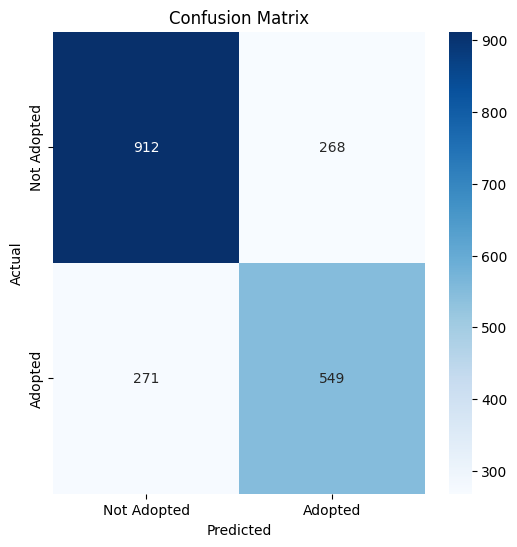

In [4]:
# Предсказание
y_pred_shelter = tree_clf.predict(X_test_shelter)

# Метрики качества
accuracy_tree = accuracy_score(y_test_shelter, y_pred_shelter)
f1_tree = f1_score(y_test_shelter, y_pred_shelter)
recall_tree = recall_score(y_test_shelter, y_pred_shelter)
precision_tree = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [5]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [6]:
# Инициализация и обучение модели решающего дерева
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_house, y_train_house)

DecisionTreeRegressor(random_state=42)

Оценка качества модели

In [7]:
# Предсказание
y_pred_house = tree_reg.predict(X_test_house)

# Метрики качества
mae_tree = mean_absolute_error(y_test_house, y_pred_house)
rmse_tree = root_mean_squared_error(y_test_house, y_pred_house)
r2_tree = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"R^2 Score: {r2_tree:.2f}")

Mean Absolute Error (MAE): 165621.36
Root Mean Squared Error (RMSE): 270434.98
R^2 Score: 0.51


## 3. Улучшение бейзлайна

### a. Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

1. Улучшение предобработки данных: масштабирование

2. Формирование новых признаков на основе комбинации существующих

3. Подбор гиперпараметров: Grid Search с кросс-валидацией для оптимизации модели

### b.1 Проверка гипотез для задачи классификации

1. Масштабирование данных

In [9]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели решающего дерева
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_scaled = tree_clf.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy_tree:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1_tree:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.73
F1 Score: 0.67
Recall: 0.67
Precision: 0.67

Сравнение с бейзлайном:
Разница в Accuracy: 0.00
Разница в F1 Score: 0.00


2. Формирование новых признаков

In [10]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели решающего дерева
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = tree_clf.predict(X_test_shelter_scaled)

accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_new_feature)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_tree:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_tree:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.74
F1 Score: 0.68
Recall: 0.67
Precision: 0.68

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: 0.01


3. Подбор гиперпараметров

In [20]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Определяем сетку гиперпараметров
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [5, 7, 10],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_tree_clf = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_tree_clf.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy_tree:.2f}")
print(f"Разница в F1 Score: {f1_best - f1_tree:.2f}")


Лучшие параметры: {'max_depth': 10, 'min_samples_split': 7}
Лучшая кросс-валидация: 0.78

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.77
F1 Score: 0.71
Recall: 0.71
Precision: 0.72

Сравнение с бейзлайном:
Разница в Accuracy: 0.03
Разница в F1 Score: 0.04


### b.2 Проверка гипотез для задачи регрессии

1. Масштабирование данных

In [21]:
# Масштабирование данных
scaler_house = MinMaxScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Обучение линейной регрессии
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = tree_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae_tree:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse_tree:.2f}")
print(f"Разница в R^2: {r2_scaled - r2_tree:.2f}")

Гипотеза 1: масштабирование
Mean Absolute Error (MAE): 164654.56
Root Mean Squared Error (RMSE): 267617.91
R-squared (R^2): 0.52

Сравнение с бейзлайном:
Разница в MAE: -966.80
Разница в RMSE: -2817.07
Разница в R^2: 0.01


2. Формирование новых признаков

In [22]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = tree_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared  Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae_tree:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse_tree:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2_tree:.2f}")

Гипотеза 2: добавление нового признака
Mean Absolute Error (MAE): 170866.27
Root Mean Squared  Error (RMSE): 272119.57
R-squared (R^2): 0.50

Сравнение с бейзлайном:
Разница в MAE: 5244.91
Разница в RMSE: 1684.59
Разница в R^2: -0.01


3. Подбор гиперпараметров

In [23]:
# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

# Подбор гиперпараметров
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [5, 7, 10],
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_house_scaled, y_train_house)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая кросс-валидация: ", grid_search.best_score_)
print()

# Лучшие параметры и метрики
best_ridge = grid_search.best_estimator_
y_pred_house_gs = best_ridge.predict(X_test_house_scaled)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

print("Гипотеза 3: подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae_tree:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse_tree:.2f}")
print(f"Разница в R^2: {r2_gs - r2_tree:.2f}")

Лучшие параметры:  {'max_depth': 5, 'min_samples_split': 10}
Лучшая кросс-валидация:  0.6258271950758519

Гипотеза 3: подбор гиперпараметров
Mean Absolute Error (MAE): 144253.57
Root Mean Squared Error (RMSE): 224019.85
R-squared (R^2): 0.66

Сравнение с бейзлайном:
Разница в MAE: -21367.79
Разница в RMSE: -46415.13
Разница в R^2: 0.15


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'max_depth': 10, 'min_samples_split': 7}

В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'max_depth': 5, 'min_samples_split': 10}

Классификация

In [24]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

tree_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=7, random_state=42)

Регрессия

In [25]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [26]:
tree_clf.fit(X_train_shelter, y_train_shelter)

DecisionTreeClassifier(max_depth=10, min_samples_split=7, random_state=42)

Регрессия

In [27]:
tree_reg.fit(X_train_house, y_train_house)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [28]:
# Предсказание
y_pred_shelter_best = tree_clf.predict(X_test_shelter)

# Метрики качества
accuracy_best_tree = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best_tree = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best_tree = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best_tree = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_best_tree:.2f}")
print(f"F1 Score: {f1_best_tree:.2f}")
print(f"Recall: {recall_best_tree:.2f}")
print(f"Precision: {precision_best_tree:.2f}")

Accuracy: 0.75
F1 Score: 0.65
Recall: 0.56
Precision: 0.77


Регрессия

In [29]:
# Предсказание
y_pred_house_best = tree_reg.predict(X_test_house)

# Метрики качества
mae_best_tree = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best_tree = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best_tree = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best_tree}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_tree}")
print(f"R-squared (R^2): {r2_best_tree}")

Mean Absolute Error (MAE): 144253.56810940392
Root Mean Squared Error (RMSE): 224019.8540238065
R-squared (R^2): 0.6615901027326043


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [30]:
print(f"Разница в accuracy: {accuracy_best_tree - accuracy_tree}")
print(f"Разница в F1 Score: {f1_best_tree - f1_tree}")

Разница в accuracy: 0.019499999999999962
Разница в F1 Score: -0.02235659721953731


Регрессия

In [31]:
print(f"Разница в MAE: {mae_best_tree - mae_tree}")
print(f"Разница в MSE: {rmse_best_tree - rmse_tree}")
print(f"Разница в R^2: {r2_best_tree - r2_tree}")

Разница в MAE: -21367.787390596088
Разница в MSE: -46415.12816870268
Разница в R^2: 0.15475910853447394


### g. Выводы

**Вывод по классификации:**

Внедрение улучшений повысило точность, но понизило F1

**Вывод по регрессии:**

Улучшения понизили MAE и RMSE, повысили R^2

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

Базовый класс дерева

In [32]:
import numpy as np


class DecisionTreeBase:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def _best_split(self, X, y):
        raise NotImplementedError("Этот метод должен быть реализован в дочернем классе.")

    def _build_tree(self, X, y, depth=0):
        """
        Рекурсивное построение дерева.
        """
        n_samples, n_features = X.shape

        # Условия остановки
        if (self.max_depth is not None and depth >= self.max_depth) or n_samples < self.min_samples_split:
            return self._leaf_value(y)

        # Найти лучшее разбиение
        split = self._best_split(X, y)

        if split is None:  # Если разбиение невозможно
            return self._leaf_value(y)

        feature_index, threshold, left_mask, right_mask = split
        left_tree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature_index': feature_index,
            'threshold': threshold,
            'left': left_tree,
            'right': right_tree
        }

    def fit(self, X, y):
        """
        Обучение модели.
        """
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)
        self.tree = self._build_tree(X, y)

    def _predict_sample(self, x, tree):
        """
        Предсказание для одного примера.
        """
        if not isinstance(tree, dict):
            return tree

        feature_value = x.iloc[tree['feature_index']]

        if feature_value <= tree['threshold']:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

    def predict(self, X):
        """
        Предсказание для множества данных.
        """
        return np.array([self._predict_sample(row, self.tree) for _, row in X.iterrows()])

Имплементация решающего дерева для классификации

In [33]:
class DecisionTreeClassifierCustom(DecisionTreeBase):
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        super().__init__(max_depth, min_samples_split, min_samples_leaf)

    def _gini_impurity(self, left_y, right_y):
        """
        Вычисляет критерий Джини для разделения.
        """
        def gini(y):
            m = len(y)

            if m == 0:
                return 0
            
            p = np.bincount(y) / m

            return 1 - np.sum(p ** 2)

        total = len(left_y) + len(right_y)

        return (len(left_y) / total) * gini(left_y) + (len(right_y) / total) * gini(right_y)

    def _leaf_value(self, y):
        """
        Возвращает наиболее часто встречающийся класс.
        """
        return np.bincount(y).argmax()

    def _best_split(self, X, y):
        best_gini = float('inf')
        best_split = None
        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            thresholds = np.unique(X.iloc[:, feature_index])

            for threshold in thresholds:
                left_mask = X.iloc[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]

                if len(left_y) >= self.min_samples_leaf and len(right_y) >= self.min_samples_leaf:
                    gini = self._gini_impurity(left_y, right_y)
                    if gini < best_gini:
                        best_gini = gini
                        best_split = (feature_index, threshold, left_mask, right_mask)

        return best_split

Имплементация решающего дерева для регрессии

In [34]:
class DecisionTreeRegressorCustom(DecisionTreeBase):
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        super().__init__(max_depth, min_samples_split, min_samples_leaf)

    def _variance_reduction(self, left_y, right_y):
        """
        Вычисляет снижение дисперсии.
        """
        def variance(y):
            return np.var(y) * len(y)

        total_var = variance(left_y) + variance(right_y)
        total_len = len(left_y) + len(right_y)
        left_weight = len(left_y) / total_len
        right_weight = len(right_y) / total_len

        return total_var - (left_weight * variance(left_y) + right_weight * variance(right_y))

    def _leaf_value(self, y):
        """
        Возвращает среднее значение.
        """
        return np.mean(y)

    def _best_split(self, X, y):
        best_reduction = -float('inf')
        best_split = None
        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            thresholds = np.unique(X.iloc[:, feature_index])
            
            for threshold in thresholds:
                left_mask = X.iloc[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]

                if len(left_y) >= self.min_samples_leaf and len(right_y) >= self.min_samples_leaf:
                    reduction = self._variance_reduction(left_y, right_y)

                    if reduction > best_reduction:
                        best_reduction = reduction
                        best_split = (feature_index, threshold, left_mask, right_mask)

        return best_split

### b. Обучение имплементированной модели

Классификация

In [39]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

tree_clf = DecisionTreeClassifierCustom(max_depth=5)
tree_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [40]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

tree_reg = DecisionTreeRegressorCustom(max_depth=5)
tree_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.71
F1 Score: 0.48
Recall: 0.32
Precision: 0.91


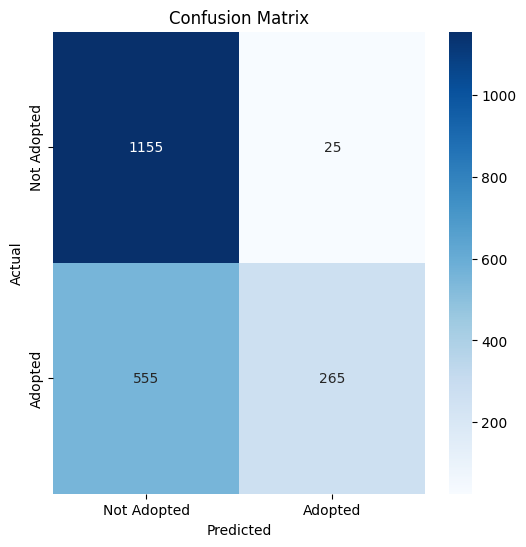

In [41]:
# Предсказание
y_pred_shelter = tree_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_tree = accuracy_score(y_test_shelter, y_pred_shelter)
f1_custom_tree = f1_score(y_test_shelter, y_pred_shelter)
recall_custom_tree = recall_score(y_test_shelter, y_pred_shelter)
precision_custom_tree = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_custom_tree:.2f}")
print(f"F1 Score: {f1_custom_tree:.2f}")
print(f"Recall: {recall_custom_tree:.2f}")
print(f"Precision: {precision_custom_tree:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [42]:
# Предсказание
y_pred_house = tree_reg.predict(X_test_house)

# Метрики качества
mae_custom_tree = mean_absolute_error(y_test_house, y_pred_house)
rmse_custom_tree = root_mean_squared_error(y_test_house, y_pred_house)
r2_custom_tree = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_custom_tree}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_tree}")
print(f"R-squared (R^2): {r2_custom_tree}")

Mean Absolute Error (MAE): 221863.99788152167
Root Mean Squared Error (RMSE): 362256.058102755
R-squared (R^2): 0.11508542066131588


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [43]:
print(f"Разница в accuracy: {accuracy_custom_tree - accuracy_tree}")
print(f"Разница в F1 Score: {f1_custom_tree - f1_tree}")

Разница в accuracy: -0.020500000000000074
Разница в F1 Score: -0.19326167951702466


Регрессия

In [44]:
print(f"Разница в MAE: {mae_custom_tree - mae_tree}")
print(f"Разница в RMSE: {rmse_custom_tree - rmse_tree}")
print(f"Разница в R^2: {r2_custom_tree - r2_tree}")

Разница в MAE: 56242.64238152167
Разница в RMSE: 91821.07591024583
Разница в R^2: -0.3917455735368145


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась хуже, чем для встроенной модели. Особенно пострадал Recall

В случае с линейной регрессией, ошибки увеличились, а R^2 стал сильно хуже

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [46]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler = MinMaxScaler()
X_train_shelter = pd.DataFrame(scaler.fit_transform(X_train_shelter), columns=X_shelter.columns)
X_test_shelter = pd.DataFrame(scaler.transform(X_test_shelter), columns=X_shelter.columns)

tree_clf = DecisionTreeClassifierCustom(max_depth=10, min_samples_split=7)

Регрессия

In [47]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = pd.DataFrame(scaler.fit_transform(X_train_house), columns=X_house.columns)
X_test_house = pd.DataFrame(scaler.transform(X_test_house), columns=X_house.columns)

tree_reg = DecisionTreeRegressorCustom(max_depth=5, min_samples_split=10)

### g. Обучение на улучшенном бейзлайне

Классификация

In [48]:
tree_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [49]:
tree_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.75
F1 Score: 0.65
Recall: 0.56
Precision: 0.77


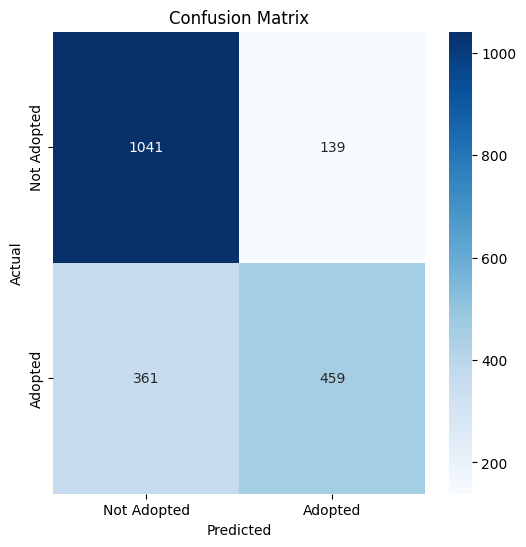

In [50]:
# Предсказание
y_pred_shelter_best = tree_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_best_tree = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_custom_best_tree = f1_score(y_test_shelter, y_pred_shelter_best)
recall_custom_best_tree = recall_score(y_test_shelter, y_pred_shelter_best)
precision_custom_best_tree = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_custom_best_tree:.2f}")
print(f"F1 Score: {f1_custom_best_tree:.2f}")
print(f"Recall: {recall_custom_best_tree:.2f}")
print(f"Precision: {precision_custom_best_tree:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [51]:
# Предсказание
y_pred_house_best = tree_reg.predict(X_test_house)

# Метрики качества
mae_custom_best_tree = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_custom_best_tree = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_custom_best_tree = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_custom_best_tree}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_best_tree}")
print(f"R-squared (R^2): {r2_custom_best_tree}")

Mean Absolute Error (MAE): 221863.99788152167
Root Mean Squared Error (RMSE): 362256.058102755
R-squared (R^2): 0.11508542066131588


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [52]:
print(f"Разница в accuracy: {accuracy_custom_best_tree - accuracy_best_tree}")
print(f"Разница в F1 Score: {f1_custom_best_tree - f1_best_tree}")

Разница в accuracy: 0.0
Разница в F1 Score: -0.0009918686607194305


Регрессия

In [53]:
print(f"Разница в MAE: {mae_custom_best_tree - mae_best_tree}")
print(f"Разница в RMSE: {rmse_custom_best_tree - rmse_best_tree}")
print(f"Разница в R^2: {r2_custom_best_tree - r2_best_tree}")

Разница в MAE: 77610.42977211776
Разница в RMSE: 138236.2040789485
Разница в R^2: -0.5465046820712884


### j. Выводы

Точность имплементированной модели с улучшениями для задачи классификации оказалась идентичной встроенной модели

Ошибки в имплементированной модели с улучшениями увеличились, R^2 очень сильно упал. Скорее всего это связано с тем, что были неправильно подобраны гиперпараметры